# Preparing data set

based on Kaggle data: https://www.kaggle.com/c/home-data-for-ml-course/overview/

In [104]:
import pandas as pd
from datetime import datetime

In [5]:
path = 'data_kaggle_house_prices/'

In [160]:
train = pd.read_csv(f'{path}train.csv', index_col=0)
test = pd.read_csv(f'{path}test.csv', index_col=0)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### adjust data types

In [148]:
num_to_cat_cols = ['MSSubClass']
cat_binary = ['Street', 'CentralAir']
custom_mofication = ['LotShape', 'Age', 'PavedDrive', 'Alley', 'Utilities']
ordered_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'HeatingQC', 'KitchenQual', 'FireplaceQu', 'Functional', 'GarageQual', 'GarageFinish', 'GarageCond',
              'PoolQC', 'Fence']

Street_dict = {'Pave':1, 'Grvl':0}
CentralAir_dict = {'Y':1, 'N':0}
qual_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0}
Bsmt_dict = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
Functional_dict = {'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7}
Fence_dict = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}

In [163]:
def adjust_data_types(train):
    
    for col in num_to_cat_cols:
        train[col] = train[col].astype(str)
        train[col] = train[col].fillna(0)
        
    for col in cat_binary:
        train[col] = train[col].map(eval(f'{col}_dict'))
        train[col] = train[col].fillna(0)
        
    for col in ordered_cat:
        for d in [qual_dict, Bsmt_dict, Functional_dict, Fence_dict]:
            if train[col].dropna().unique()[0] in d:
                train[col] = train[col].map(d)
        train[col] = train[col].fillna(0)
                
    for col in custom_mofication:
        if col == 'LotShape':
            train[col] = train[col].apply(lambda x: 1 if x =='Reg' else 0) 
        if col == 'Age':
            train['Age'] = datetime.now().year - train['YearBuilt']
        if col in ['PavedDrive']:
            train[col] = train[col].apply(lambda x: 1 if x =='Y' else 0) 
        if col == 'Alley':
            train[col] = train[col].map(Street_dict)
        if col == 'Utilities':
            train[col] = train[col].apply(lambda x: 1 if x =='AllPub' else 0)

In [164]:
adjust_data_types(train)
adjust_data_types(test)
cat_f = train.select_dtypes(exclude='number').columns.tolist()
num_f = train.select_dtypes(include='number').columns.tolist()

## Visualising numerical featues on target variable

In [141]:
import matplotlib.pyplot as plt
import numpy as np

IndexError: list index out of range

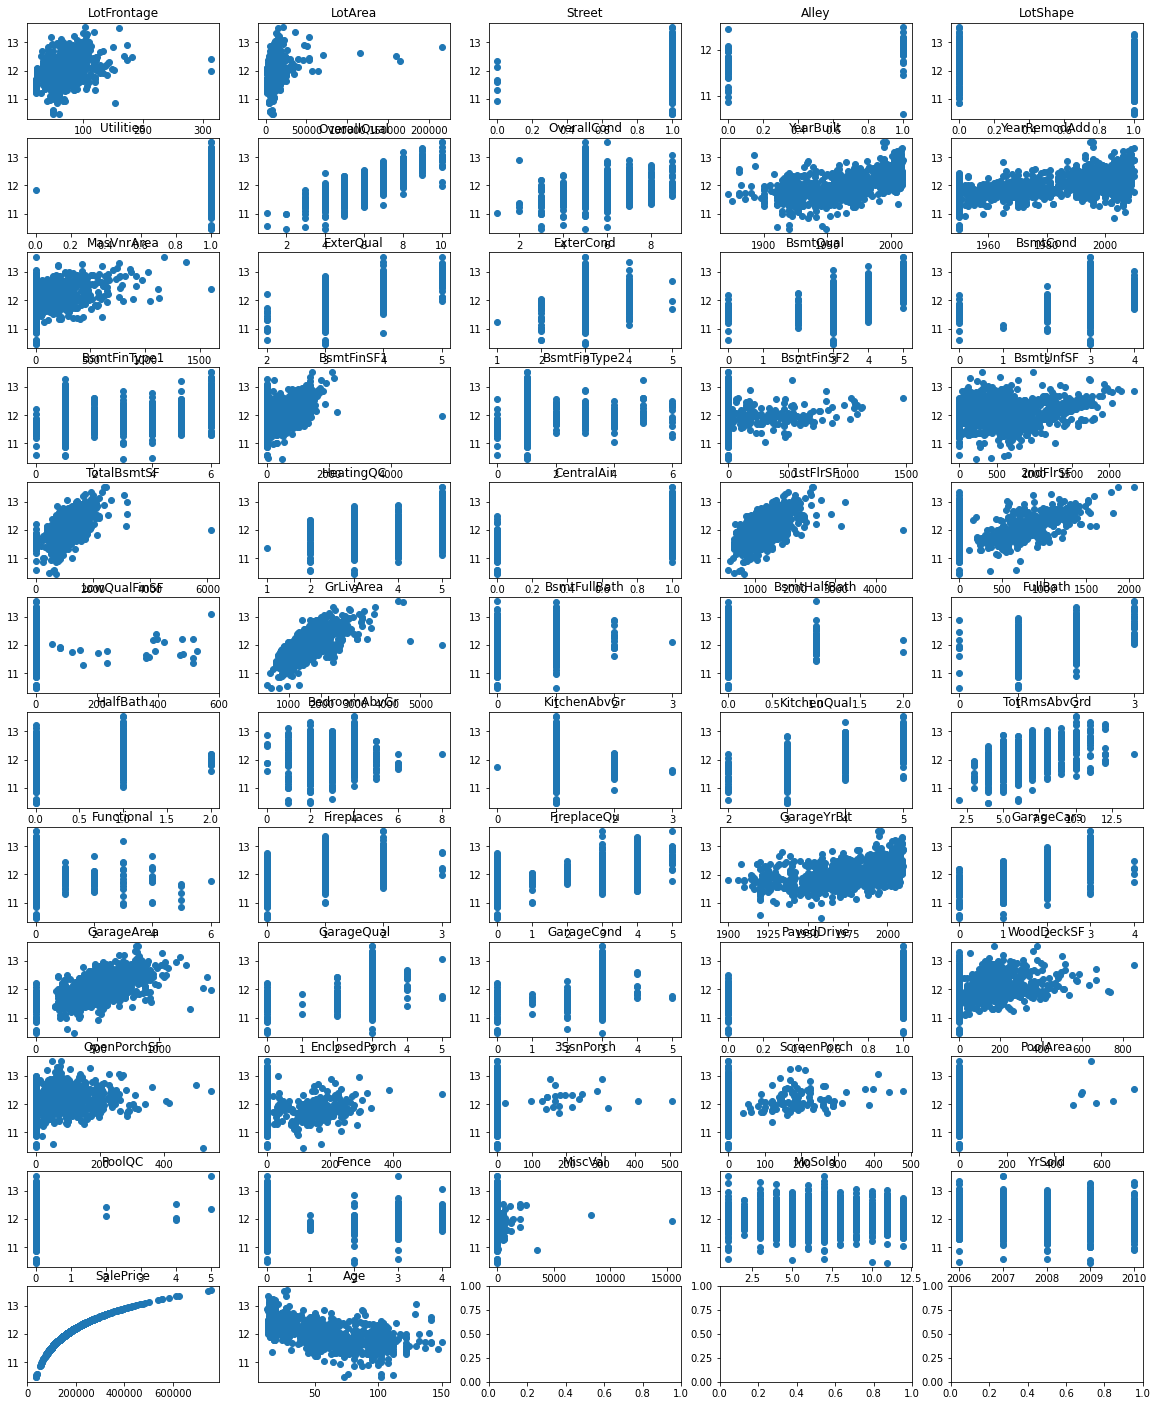

In [194]:
i = 0
fig, ax = plt.subplots(nrows=12, ncols=5, figsize=(20, 25))
for row in ax:
    for col in row:
        col.scatter(x = train[num_f[i]], y = np.log(train['SalePrice']))
        col.title.set_text(num_f[i])
        i += 1    

## Visualising categorical featues on target variable¶

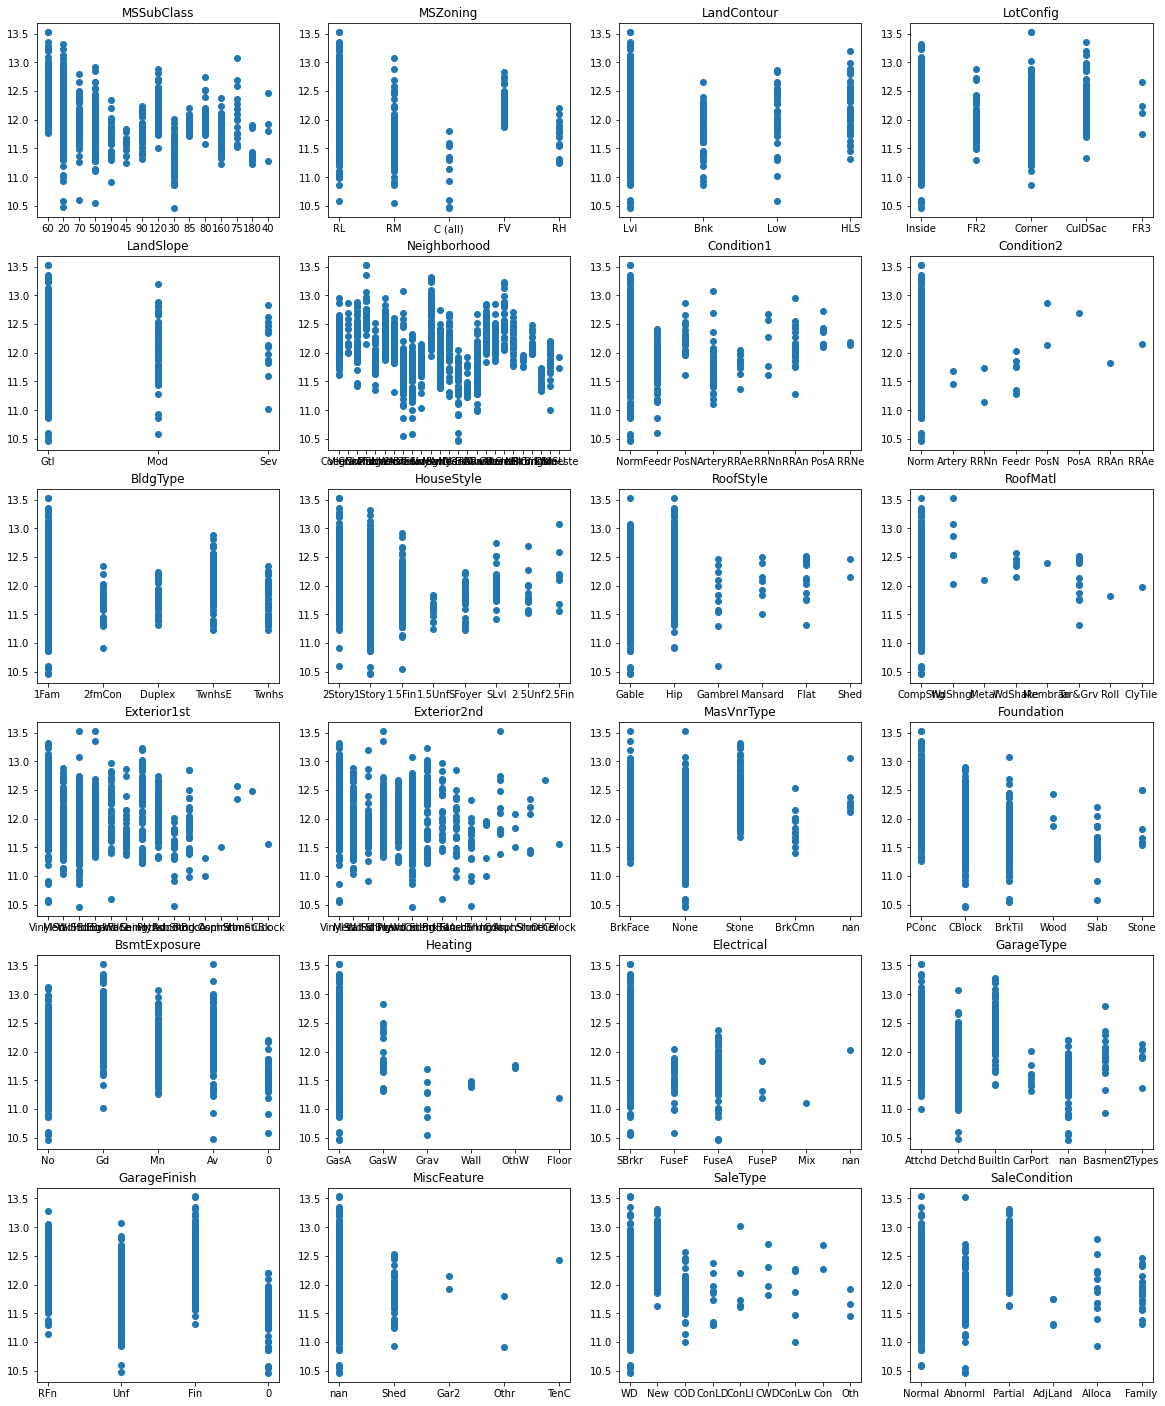

In [196]:
i = 0
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20, 25))
for row in ax:
    for col in row:
        col.scatter(x = train[cat_f[i]].astype(str), y = np.log(train['SalePrice']))
        col.title.set_text(cat_f[i])
        i += 1     

In [197]:
train.to_csv(path+'train_clean.csv')
test.to_csv(path+'test_clean.csv')